9204
[FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'), FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')]


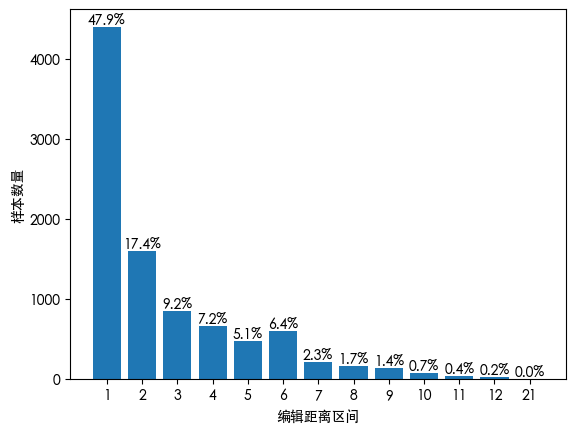

In [9]:
import matplotlib
from eval import tokenize
import math
from decimal import Decimal

from algo import calc_rouge_l, cal_cosine_similarity, get_identifier_set, get_token_str, calculate_coverage_ratio

import json
from collections import Counter
import matplotlib.pyplot as plt
import jsonlines

from nltk import edit_distance

path = '../data/raw/test_clean.jsonl'

# Replace 'your_metric_function' with your actual function to calculate the metric
def calculate_rouge(src_desc, dst_desc):
    return calc_rouge_l([dst_desc], src_desc)[0]

def calc_ed(a, b):
    return edit_distance(tokenize(a), tokenize(b))
    

metrics = []

line_cnt = 0
with jsonlines.open(path) as reader:
    for parsed in reader:
        line_cnt += 1
        old_method = parsed['src_method']
        new_method = parsed['dst_method']
        src_desc = parsed['src_desc']
        dst_desc = parsed['dst_desc']
        # Calculate the metric and append to the list
        metrics.append(
            {
                'ed': calc_ed(src_desc, dst_desc)
            }
        )

print(line_cnt)
sum = line_cnt

for m_key, m_name, m_preserve in (
        # ('recall', 'Rouge-L Recall', 1),
        # # ('precision', 'Rouge-L Precision', 1),
        # # ('f1', 'Rouge-L F1', 1),
        # # ('cs1', 'Cosine Similarity(without lexer)', 2),
        # # ('cs2', 'Cosine Similarity(with lexer)', 2),
        # # ('ratio', 'Coverage', 2)
        ('ed', '编辑距离', 2),
):
    # Count the occurrences of each metric interval
    metric_intervals = [str(round(metric[m_key], m_preserve)) for metric in metrics]  
    counts = Counter(metric_intervals)
    counts = dict(sorted(counts.items(), key=lambda item: int(item[0])))
    
    # Plotting the histogram
    # print([f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name])
    matplotlib.rcParams['font.family'] = ['Heiti TC']
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')  # Set the background color of the figure to white
    ax.set_facecolor('white')  # Set the background color of the axes to white
    bars = ax.bar(counts.keys(), counts.values())
    for bar in bars:
        yval = bar.get_height()
        pct = f'{100 * yval / sum:.1f}%'
        ax.text(bar.get_x() + bar.get_width() / 2, yval, pct, va='bottom', ha='center')
    ax.set_xlabel(f'{m_name}区间')
    ax.set_ylabel("样本数量")
    # ax.set_title(f'Histogram of {m_name}')

    
    plt.show()

